In [16]:
import numpy as np
import csv
import scipy
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

In [8]:
array = np.loadtxt('accel_noise_1.csv', delimiter=',')
print(array)

[5.25 5.25 5.25 ... 5.3  5.3  5.3 ]


In [17]:
y = fft(array);
#x_axis = np.linspace(0.0,len(array)*0.00005,len(array))
xf = fftfreq(len(array), 0.00005)[:len(array)//2]

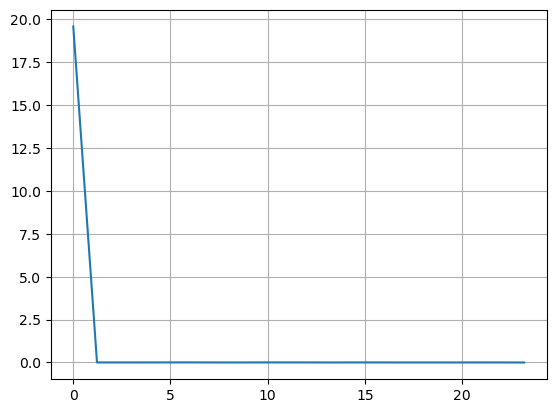

In [23]:
plt.plot(xf[0:20], 2.0/len(array)*np.abs(y[0:20]))
plt.grid()
plt.show()

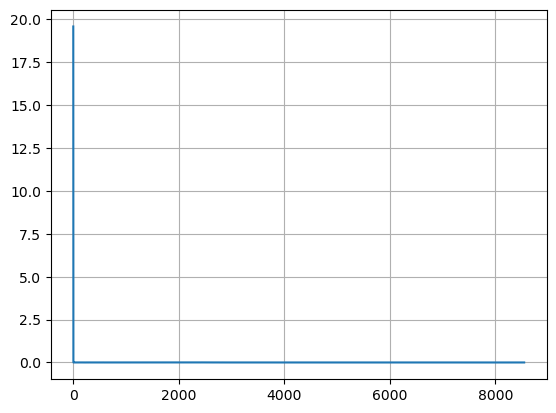

In [37]:
array = np.loadtxt('accel_noise_2.csv', delimiter=',')
y = fft(array);
#x_axis = np.linspace(0.0,len(array)*0.00005,len(array))
xf = fftfreq(len(array), 0.00005)[:len(array)//2]
plt.plot(xf[0:7000], 2.0/len(array)*np.abs(y[0:7000]))
plt.grid()
plt.show()

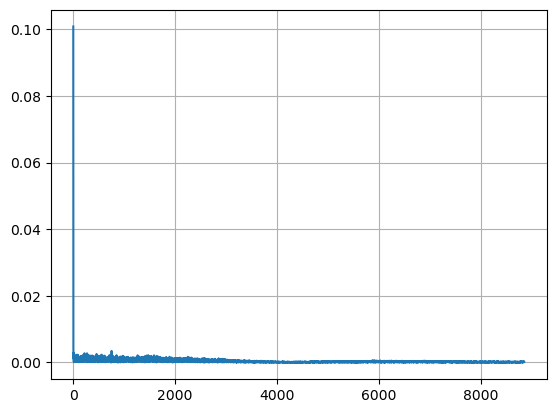

In [26]:
array = np.loadtxt('accel_noise_3.csv', delimiter=',')
y = fft(array);
#x_axis = np.linspace(0.0,len(array)*0.00005,len(array))
xf = fftfreq(len(array), 0.00005)[:len(array)//2]
plt.plot(xf[0:7000], 2.0/len(array)*np.abs(y[0:7000]))
plt.grid()
plt.show()

In [80]:
filt = scipy.signal.iirfilter(2,.0005,btype='highpass')
print(filt)

(array([ 0.9988899 , -1.99777979,  0.9988899 ]), array([ 1.        , -1.99777856,  0.99778102]))


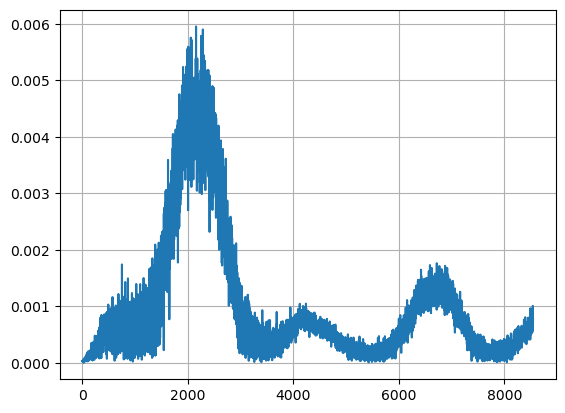

In [83]:
array = np.loadtxt('accel_noise_2.csv', delimiter=',')
new_array = np.zeros(len(array))
for i in range(len(array)):
    if(i<4):
        continue
    avg = (array[i]+array[i-1]+array[i-2]+array[i-3]+array[i-4])*0.2
    new_array[i] = array[i]-avg
    
    
y = fft(new_array);    
#x_axis = np.linspace(0.0,len(array)*0.00005,len(array))
xf = fftfreq(len(array), 0.00005)[:len(array)//2]
plt.plot(xf[0:7000], 2.0/len(array)*np.abs(y[0:7000]))
plt.grid()

#x_conv = scipy.ndimage.convolve1d(array,filt)
#y = fft(x_conv);
#x_axis = np.linspace(0.0,len(array)*0.00005,len(array))
#xf = fftfreq(len(array), 0.00005)[:len(array)//2]
#plt.plot(xf[0:100], 2.0/len(array)*np.abs(y[0:100]))
#plt.grid()
#plt.show()

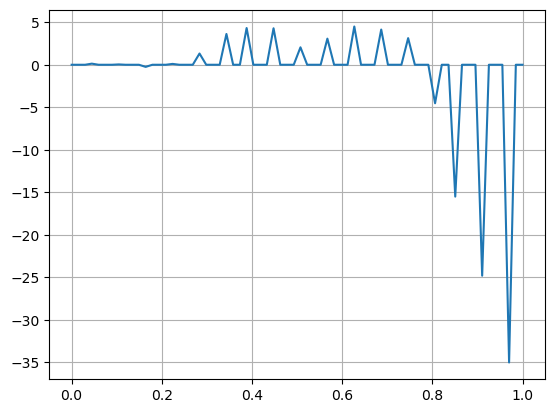

In [89]:
array = np.loadtxt('arm_extend.csv', delimiter=',')
clean_arry = array
#for i in range(len(array)):
    #if(array[i] != 0):
    #    clean_arry.append(array[i])
x = np.linspace(0,1,len(clean_arry))
plt.plot(x, clean_arry)
plt.grid()
plt.show()

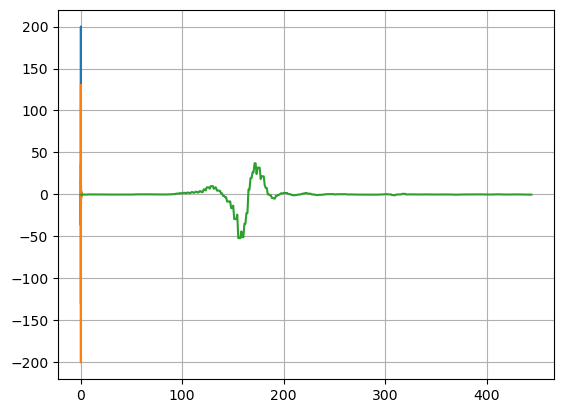

In [129]:
array = np.loadtxt('extend_2.csv', delimiter=',')
conv_arry = [1,1,1,1,1,1,1,1,1,1]
#conv_arry = [-.25,-.5,-.75,-1,0,1,.75,.5,.25]
clean_arry = []
#for i in range(len(array)):
#    if(array[i] != 0):
#        clean_arry.append(array[i])
clean_arry = scipy.ndimage.convolve1d(array,conv_arry)
#conv_arry = [-.25,-.5,-.75,-1,0,1,.75,.5,.25]
conv_arry = [0,0,0,0,-1,-1,-1,-1]
conv_arry2 = [0,0,0,0,1,1,1,1]
clean_arry2 = scipy.ndimage.convolve1d(clean_arry,conv_arry)
clean_arry3 = scipy.ndimage.convolve1d(clean_arry,conv_arry2)
x = np.linspace(0,1,len(clean_arry2))
plt.plot(x, clean_arry2)
plt.plot(x, clean_arry3)
x = np.linspace(0,len(clean_arry),len(clean_arry))
plt.plot(x, clean_arry)
plt.grid()
plt.show()

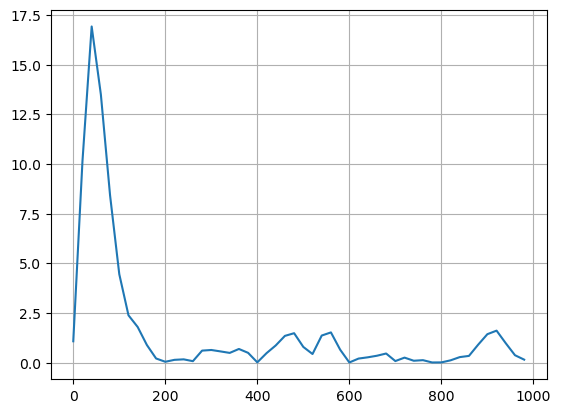

In [131]:
#conv_arry = [0,1,2,1,0]
#clean_arry = scipy.ndimage.convolve1d(clean_arry,conv_arry)
y = fft(clean_arry[100:200]);    
#x_axis = np.linspace(0.0,len(array)*0.00005,len(array))
xf = fftfreq(len(y), 0.0005)[:len(y)//2]
plt.plot(xf[0:50], 2.0/len(y)*np.abs(y[0:50]))
plt.grid()

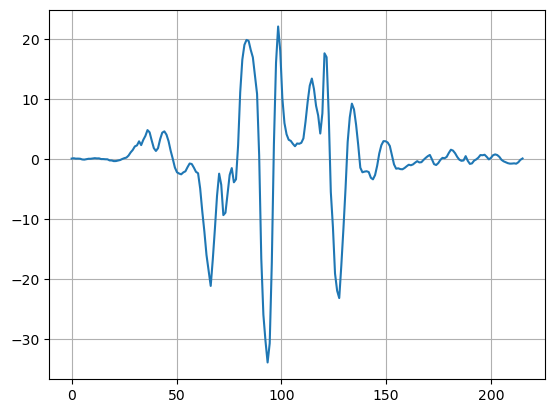

In [326]:
array = np.loadtxt('punch_1125Hz_3.csv', delimiter=',')
conv_arry = [1,1,1,1,1,1,1,1,1,1]
#conv_arry = [-.25,-.5,-.75,-1,0,1,.75,.5,.25]
clean_arry = []
#for i in range(len(array)):
#    if(array[i] != 0):
#        clean_arry.append(array[i])
clean_arry = scipy.ndimage.convolve1d(array,conv_arry)
conv_arry2 = np.array([2,22,97,159,97,22,2])*(1/1003)
clean_arry2 = scipy.ndimage.convolve1d(clean_arry,conv_arry2)

x = np.linspace(0,len(array),len(array))
plt.plot(x, array)
plt.grid()
plt.show()

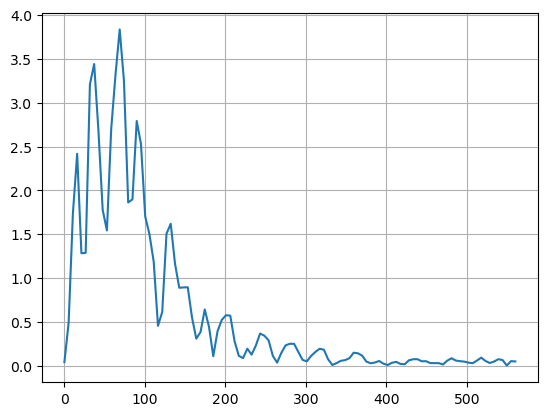

In [327]:
y = fft(array);
xf = fftfreq(len(y), 0.00088)[:len(y)//2]
plt.plot(xf, 2.0/len(y)*np.abs(y[0:len(y)//2]))
plt.grid()

In [328]:
[b,a] = scipy.signal.iirfilter(2,[.03,.1],btype ='bandpass')
print(b)
print(a)

[ 0.01043241  0.         -0.02086483  0.          0.01043241]
[ 1.         -3.63626743  5.01393974 -3.1096456   0.73272603]


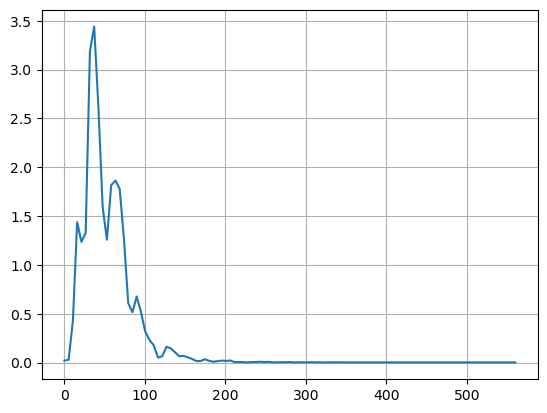

In [329]:
past_out = [0,0,0,0]
past_in = [0,0,0,0]
filtered_array = []
for i in range(len(array)):
    filtered_array.append((1/a[0])*(b[0]*array[i]+b[1]*past_in[0]+b[2]*past_in[1]+b[3]*past_in[2]+b[4]*past_in[3]-a[1]*past_out[0]-a[2]*past_out[1]-a[3]*past_out[2]-a[4]*past_out[3]))
    past_in[3] = past_in[2]
    past_in[2] = past_in[1]
    past_in[1] = past_in[0]
    past_in[0] = array[i]
    past_out[3] = past_out[2]
    past_out[2] = past_out[1]
    past_out[1] = past_out[0]
    past_out[0] = filtered_array[i]
y = fft(filtered_array);
xf = fftfreq(len(y), 0.00088)[:len(y)//2]
plt.plot(xf, 2.0/len(y)*np.abs(y[0:len(y)//2]))
plt.grid()
    

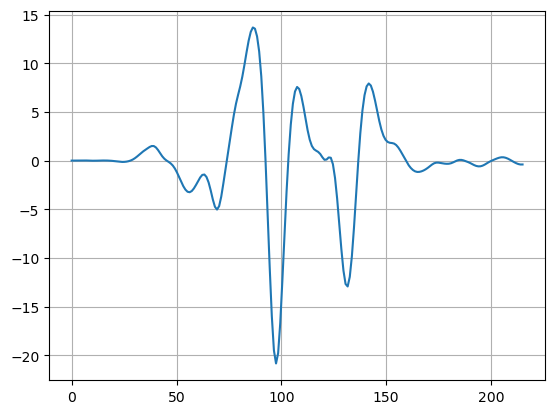

In [330]:
x = np.linspace(0,len(filtered_array),len(filtered_array))
fall_edge = scipy.ndimage.convolve1d(filtered_array,[-.1,-.2,-.3,-.4])
plt.plot(x, filtered_array)
#plt.plot(x, array)
plt.grid()
plt.show()

[ 1.         -3.26231331  4.04702664 -2.25646272  0.4762797 ]
[0.00028314 0.00113258 0.00169887 0.00113258 0.00028314]


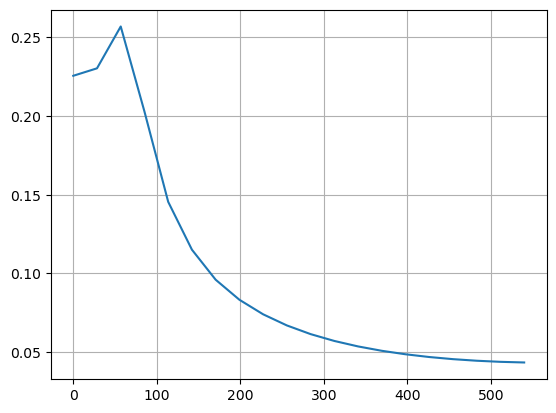

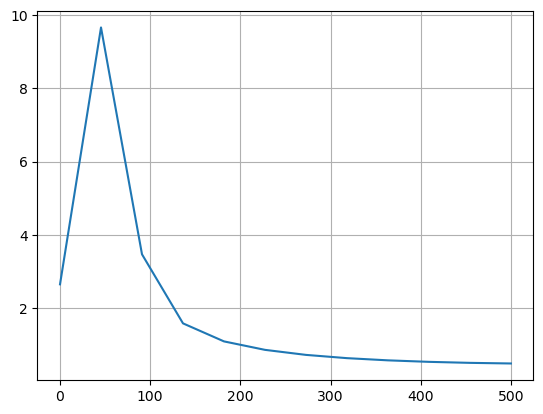

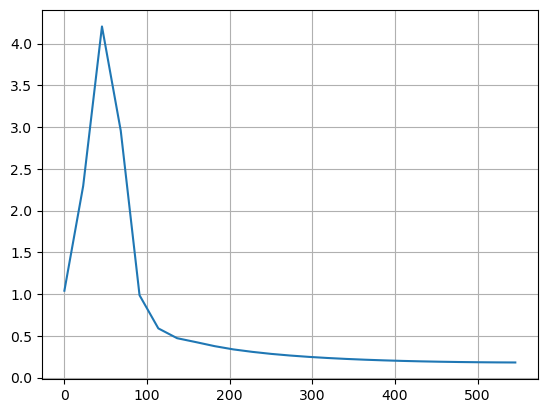

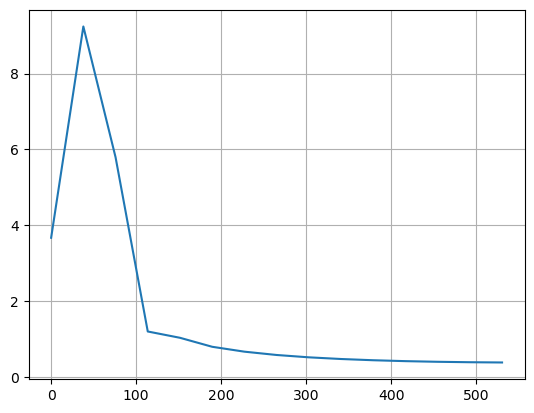

In [331]:
[b,a] = scipy.signal.iirfilter(4,.09,btype ='lowpass')
print(a)
print(b)
past_out = [0,0,0,0]
past_in = [0,0,0,0]
filtered_array = []
for i in range(len(array)):
    filtered_array.append((1/a[0])*(b[0]*array[i]+b[1]*past_in[0]+b[2]*past_in[1]+b[3]*past_in[2]+b[4]*past_in[3]+
                                    -a[1]*past_out[0]-a[2]*past_out[1]-a[3]*past_out[2]-a[4]*past_out[3]))
    
    past_in[3] = past_in[2]
    past_in[2] = past_in[1]
    past_in[1] = past_in[0]
    past_in[0] = array[i]
    
    past_out[3] = past_out[2]
    past_out[2] = past_out[1]
    past_out[1] = past_out[0]
    past_out[0] = filtered_array[i]
    
y = fft(filtered_array[:40]);
xf = fftfreq(len(y), 0.00088)[:len(y)//2]
plt.plot(xf, 2.0/len(y)*np.abs(y[0:len(y)//2]))
plt.grid()
plt.show()
y = fft(filtered_array[100:125]);
xf = fftfreq(len(y), 0.00088)[:len(y)//2]
plt.plot(xf, 2.0/len(y)*np.abs(y[0:len(y)//2]))
plt.grid()
plt.show()
y = fft(filtered_array[125:175]);
xf = fftfreq(len(y), 0.00088)[:len(y)//2]
plt.plot(xf, 2.0/len(y)*np.abs(y[0:len(y)//2]))
plt.grid()
plt.show()
y = fft(filtered_array[85:115]);
xf = fftfreq(len(y), 0.00088)[:len(y)//2]
plt.plot(xf, 2.0/len(y)*np.abs(y[0:len(y)//2]))
plt.grid()

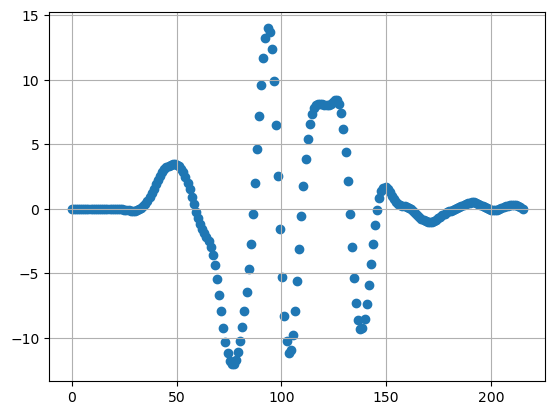

In [332]:
x = np.linspace(0,len(filtered_array),len(filtered_array))
#fall_edge = scipy.ndimage.convolve1d(filtered_array,[-.1,-.2,-.3,-.4])
plt.scatter(x, filtered_array)
#plt.plot(x, array)
plt.grid()
plt.show()

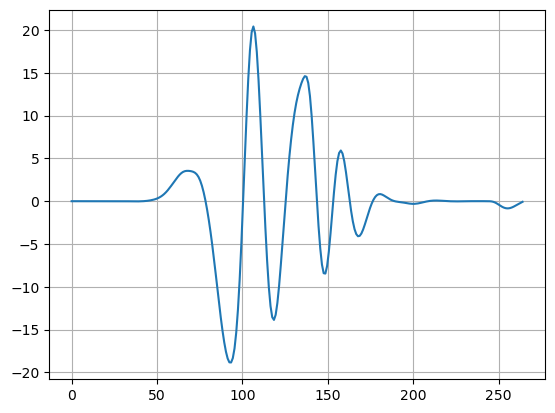

In [254]:
x = np.linspace(0,len(filtered_array),len(filtered_array))
#fall_edge = scipy.ndimage.convolve1d(filtered_array,[-.1,-.2,-.3,-.4])
plt.plot(x, filtered_array)
#plt.plot(x, array)
plt.grid()
plt.show()

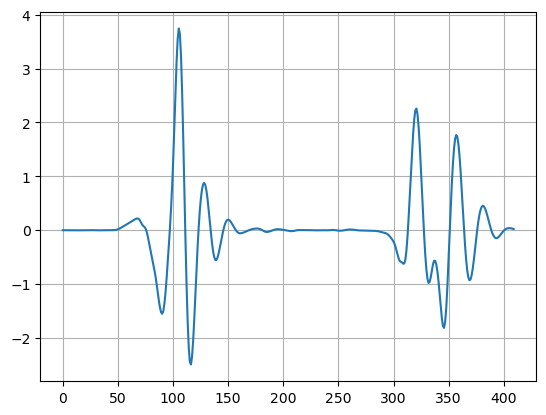

In [251]:
prev = 0
deltas = []
for i in range(len(filtered_array)):
    deltas.append(filtered_array[i]-prev)
    prev = filtered_array[i]
plt.plot(x, deltas)
#plt.plot(x, array)
plt.grid()
plt.show()

In [257]:
[z,p,k] = scipy.signal.iirfilter(4,.09,btype ='lowpass',output='zpk')
print(p)

[0.86765795+0.23288965j 0.76349871+0.08488564j 0.76349871-0.08488564j
 0.86765795-0.23288965j]


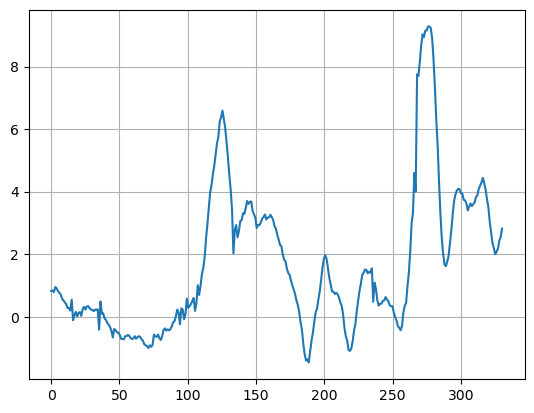

In [334]:
array = np.loadtxt('shuffle_right_2.csv', delimiter=',')
conv_arry = [1,1,1,1,1,1,1,1,1,1]
#conv_arry = [-.25,-.5,-.75,-1,0,1,.75,.5,.25]
clean_arry = []
#for i in range(len(array)):
#    if(array[i] != 0):
#        clean_arry.append(array[i])
clean_arry = scipy.ndimage.convolve1d(array,conv_arry)
conv_arry2 = np.array([2,22,97,159,97,22,2])*(1/1003)
clean_arry2 = scipy.ndimage.convolve1d(clean_arry,conv_arry2)

x = np.linspace(0,len(array),len(array))
plt.plot(x, array)
plt.grid()
plt.show()

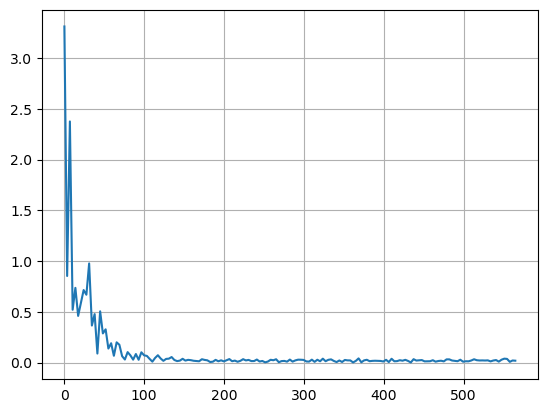

In [335]:
y = fft(array);
xf = fftfreq(len(y), 0.00088)[:len(y)//2]
plt.plot(xf, 2.0/len(y)*np.abs(y[0:len(y)//2]))
plt.grid()

In [342]:
[b,a] = scipy.signal.iirfilter(4,[.02,.08],btype ='bandpass')
print(len(a))

9


In [343]:
array_avg = []
for i in range(len(array)):
    if(i<4):
        array_avg.append(0.0)
        continue
    array_avg.append(array[i]-(array[i]+array[i-1]+array[i-2]+array[i-3]+array[i-4])*0.2)


past_out = [0,0,0,0,0,0,0,0]
past_in = [0,0,0,0,0,0,0,0]
filtered_array = []
for i in range(len(array_avg)):
    sum = b[0]*array_avg[i]
    for k in range(len(past_out)):
        sum = sum+b[k+1]*past_in[k]-a[k+1]*past_out[k]
    filtered_array.append(sum)
    past_in[7] = past_in[6]
    past_in[6] = past_in[5]
    past_in[5] = past_in[4]
    past_in[4] = past_in[3]
    past_in[3] = past_in[2]
    past_in[2] = past_in[1]
    past_in[1] = past_in[0]
    past_in[0] = array_avg[i]
    
    past_out[7] = past_out[6]
    past_out[6] = past_out[5]
    past_out[5] = past_out[4]
    past_out[4] = past_out[3]
    past_out[3] = past_out[2]
    past_out[2] = past_out[1]
    past_out[1] = past_out[0]
    past_out[0] = filtered_array[i]

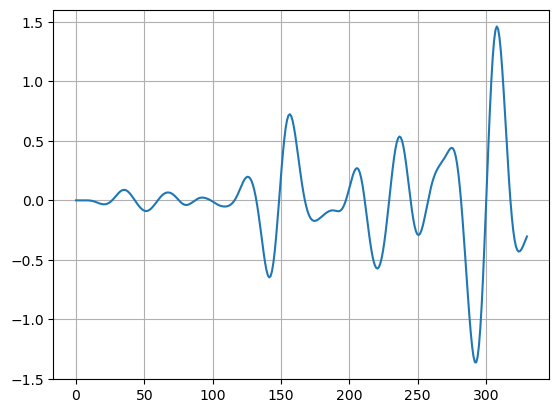

In [345]:
x = np.linspace(0,len(filtered_array),len(filtered_array))

plt.plot(x, filtered_array)

plt.grid()
plt.show()

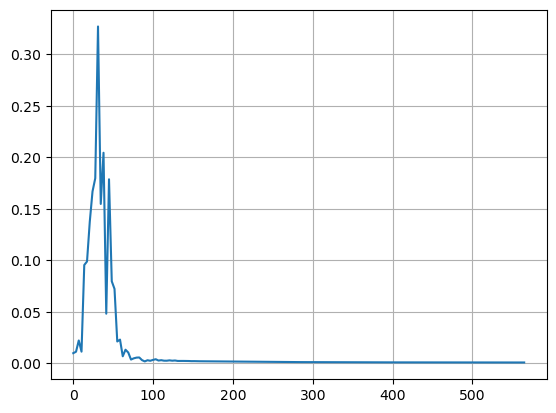

In [346]:
y = fft(filtered_array);
xf = fftfreq(len(y), 0.00088)[:len(y)//2]
plt.plot(xf, 2.0/len(y)*np.abs(y[0:len(y)//2]))
plt.grid()

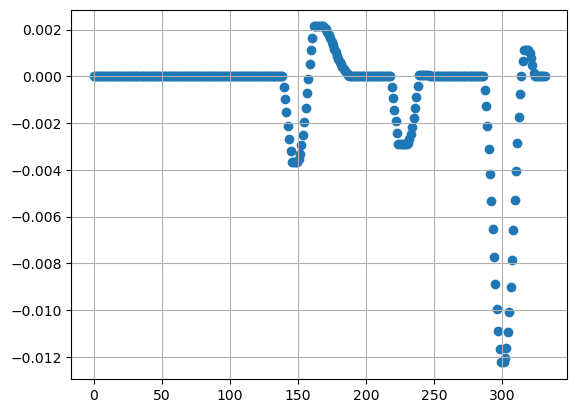

In [347]:
vel_arry = [0]
curr_vel = 0.0
for i in range(len(filtered_array)):
    if(vel_arry[i] == 0.0 and abs(filtered_array[i]) < 0.5):
        vel_arry.append(0.0)
        continue
    if(abs(filtered_array[i]) > 0.5):
        vel_arry.append(vel_arry[i]+filtered_array[i]*0.00088)
    elif((vel_arry[i]> 0.0 and filtered_array[i]) < 0.0 or (vel_arry[i]< 0.0 and filtered_array[i] > 0.0) ):
        if((vel_arry[i]+filtered_array[i]*0.00088)*vel_arry[i] < 0.0):
            vel_arry.append(0.0)
        else:
            vel_arry.append(vel_arry[i]+filtered_array[i]*0.00088)
    else:
        vel_arry.append(vel_arry[i])
    
x = np.linspace(0,len(vel_arry),len(vel_arry))
plt.scatter(x, vel_arry)
 
plt.grid()
plt.show() 

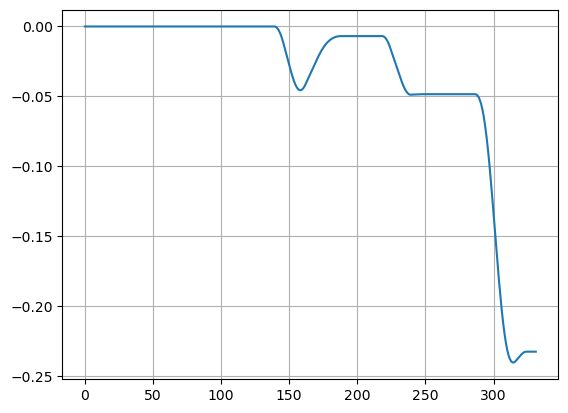

In [348]:
pos = [0.0]
for i in range(len(vel_arry)):
    pos.append(pos[i]+vel_arry[i])
plt.plot(x, pos[0:331])
 
plt.grid()
plt.show()